## ***ConcreteStrength problem*** 




In [1]:
## importing of libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Load the Dataset

In [2]:
c = pd.read_csv(r"C:\Users\ambar\Downloads\PRCP-1019-ConcreteStren\Data\concrete.csv")

In [3]:
c.head() # describes the first five rows of dataset

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
c.tail() # describes the last five rows of dataset

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


## ***Data Exploration and Analysis***

In [5]:
c.isnull() # used to check if any missing values in the dataset

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


In [6]:
c.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
c.describe() # summarizes the whole dataset stats(i.e mean value, min, max,count,e.t.c...)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


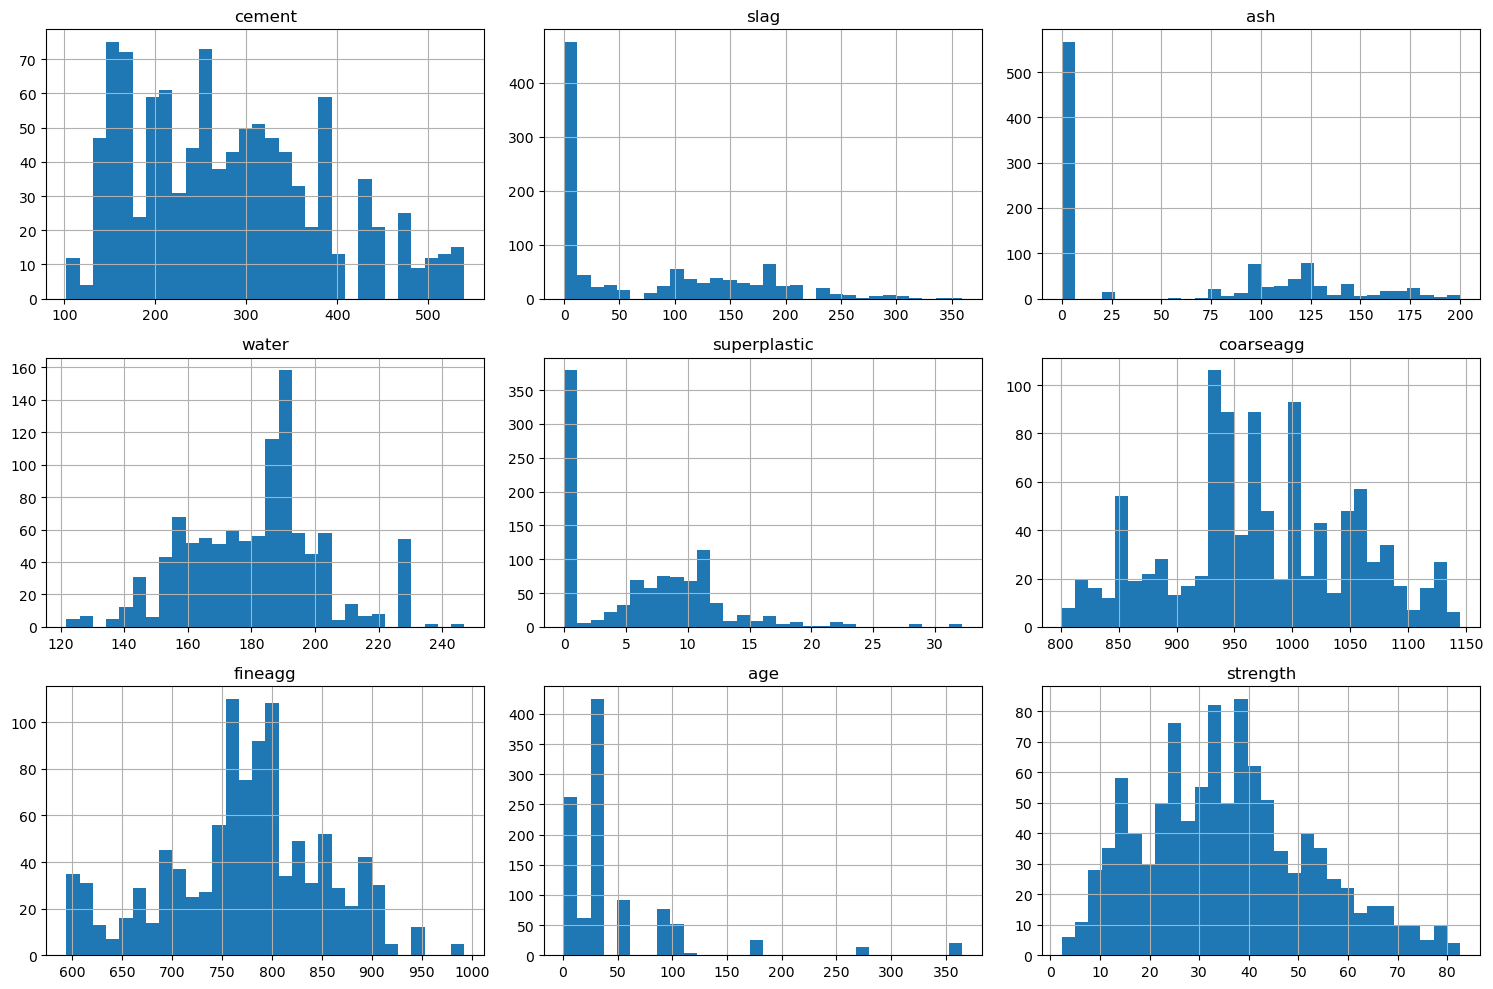

In [8]:
# Visualization of distribution of each feature

c.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

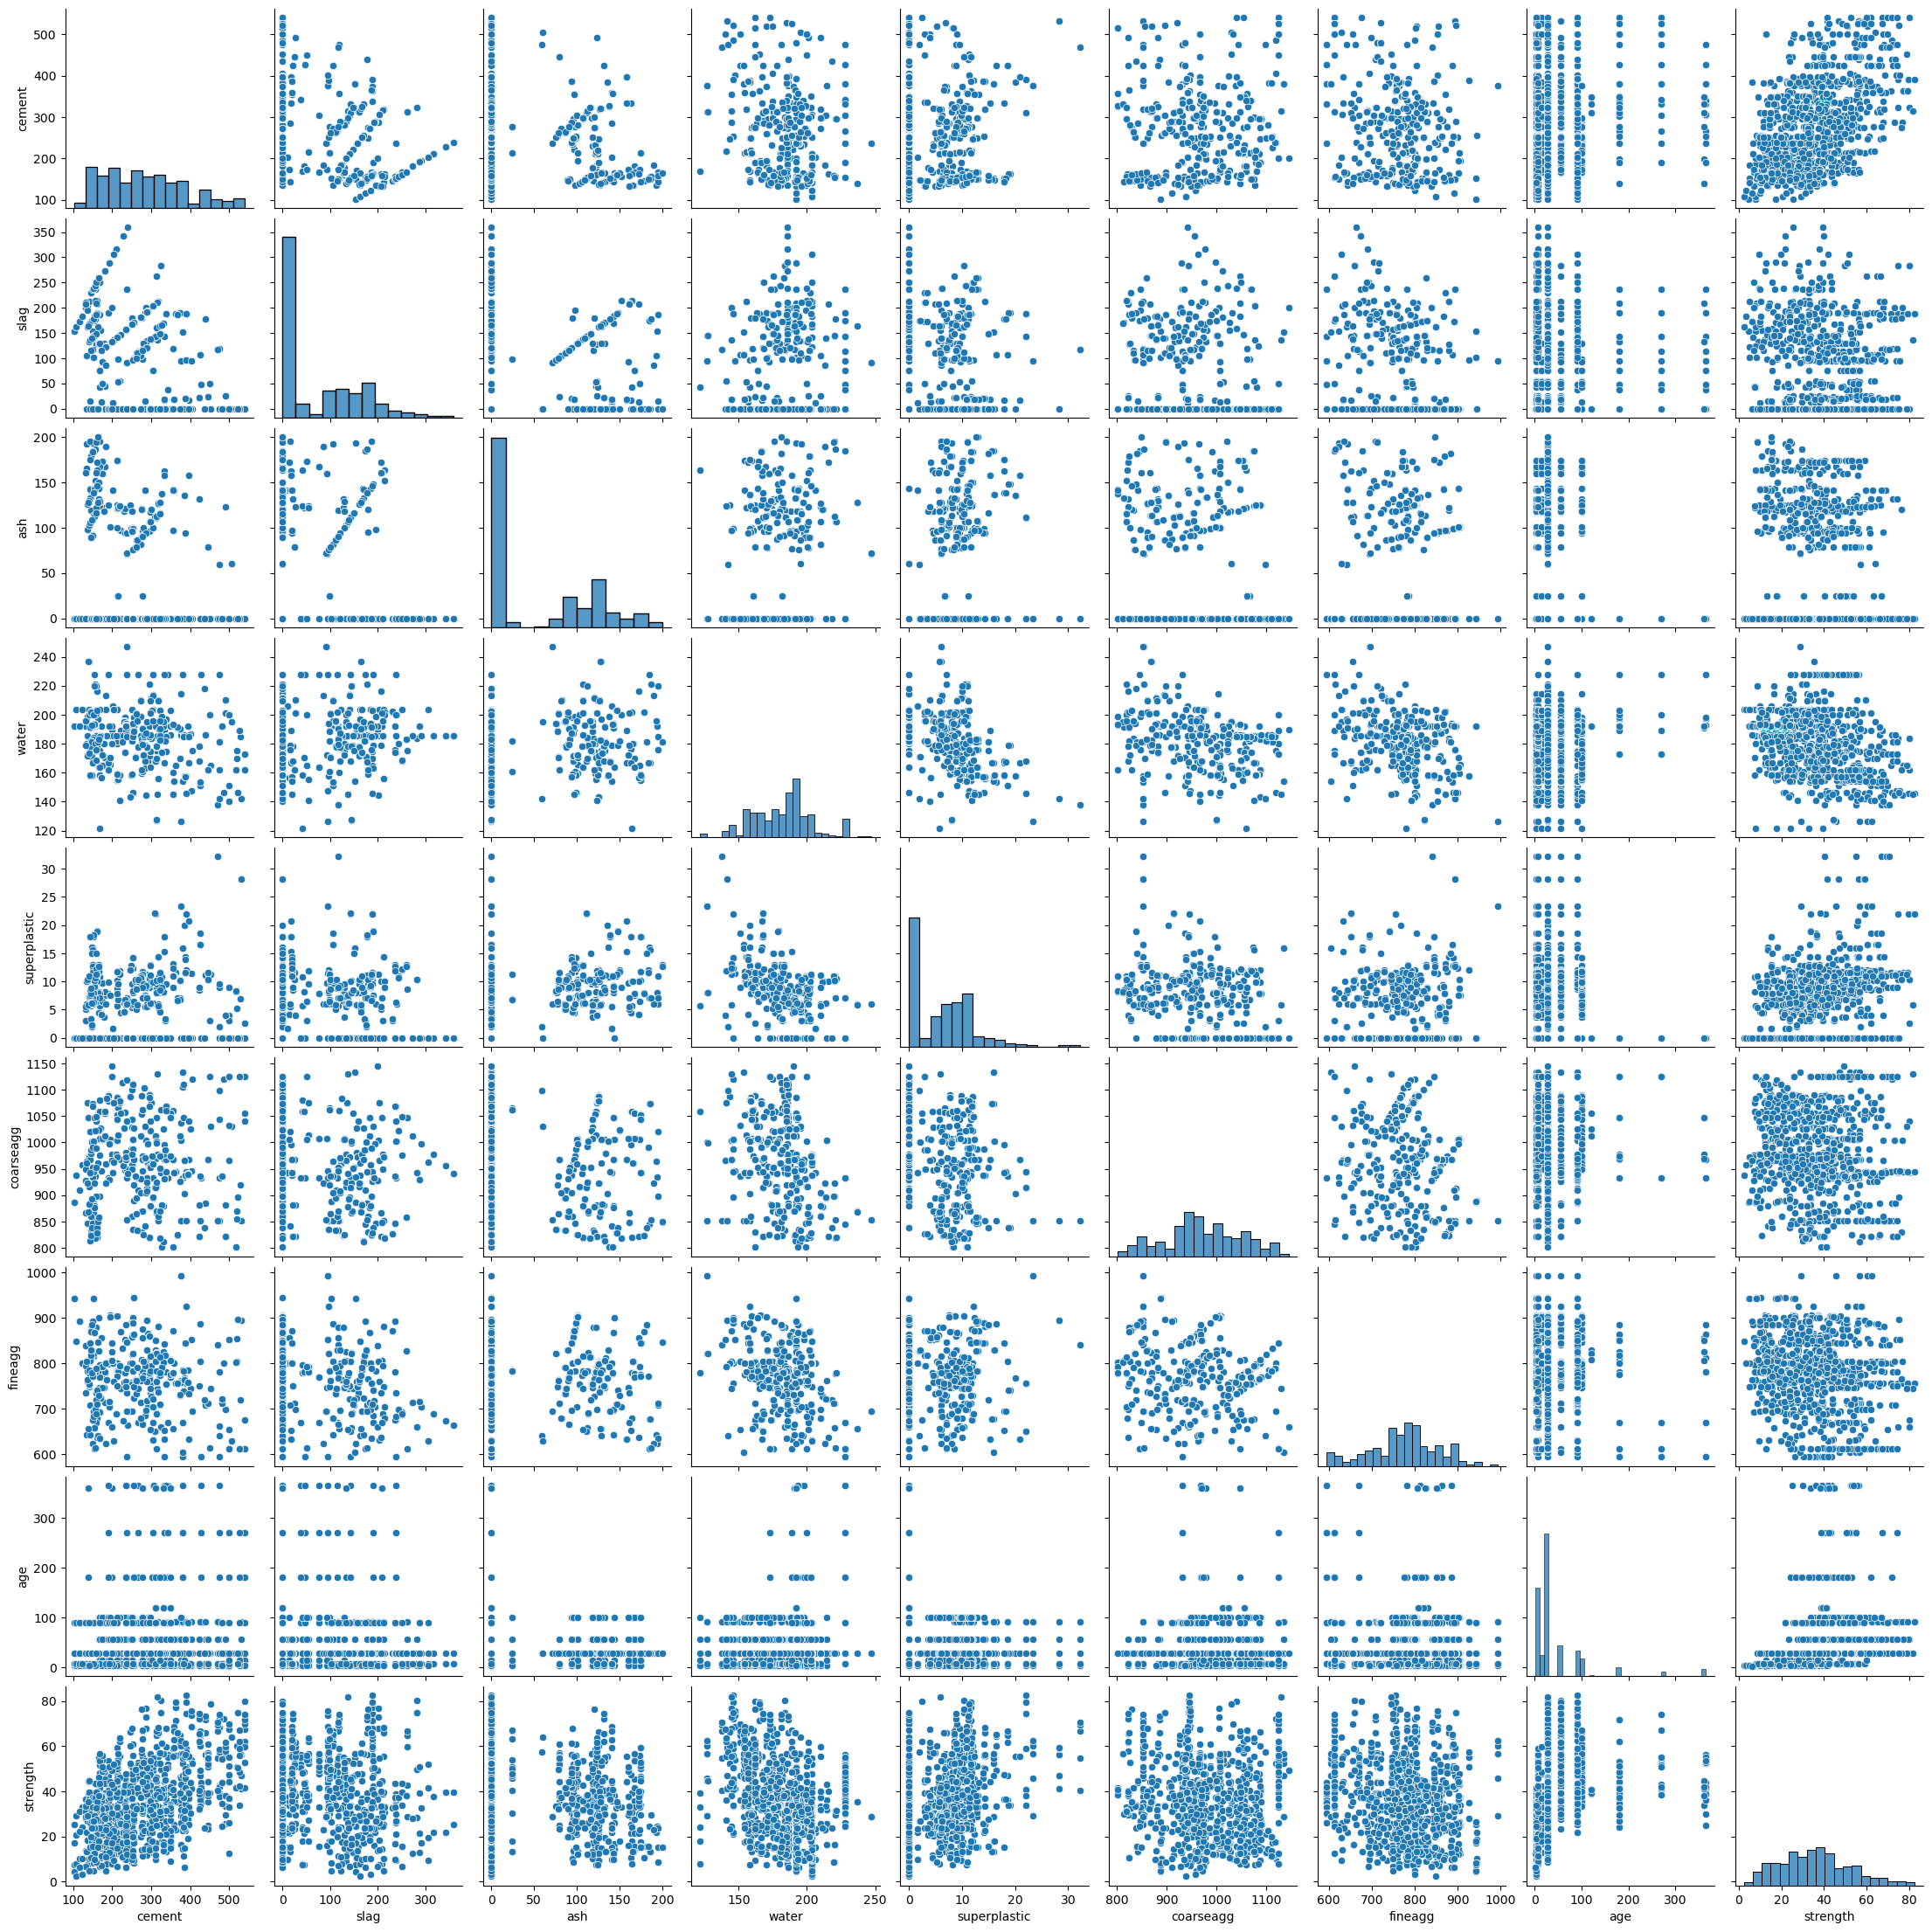

In [9]:
sns.pairplot(c)
plt.show()

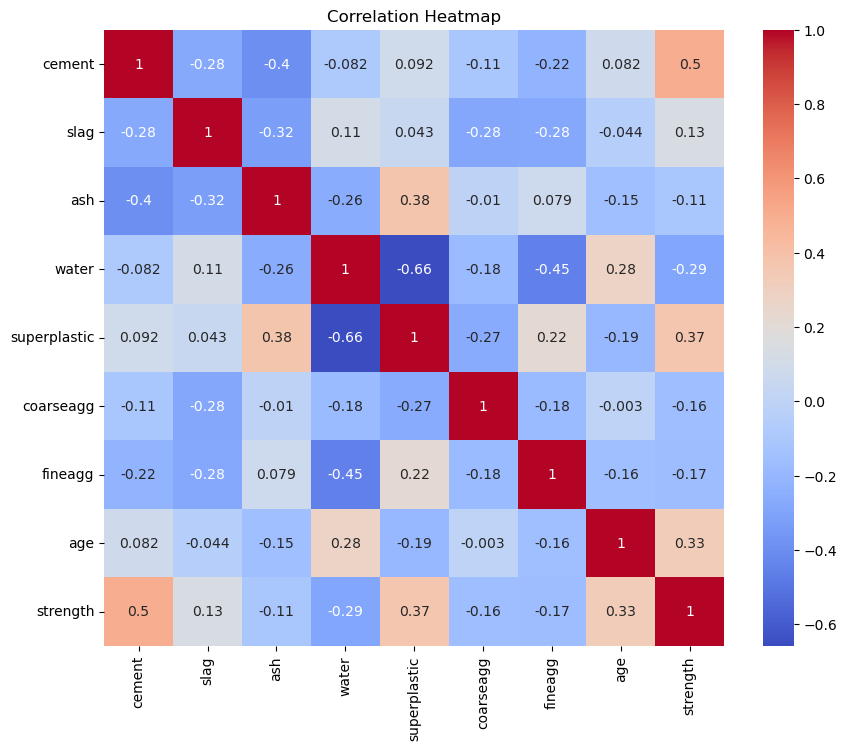

In [10]:
# Correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(c.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
c.mean()

cement          281.167864
slag             73.895825
ash              54.188350
water           181.567282
superplastic      6.204660
coarseagg       972.918932
fineagg         773.580485
age              45.662136
strength         35.817961
dtype: float64

In [12]:
c.min()

cement          102.00
slag              0.00
ash               0.00
water           121.80
superplastic      0.00
coarseagg       801.00
fineagg         594.00
age               1.00
strength          2.33
dtype: float64

## ***Data Pre-Processing***

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
# Splitting the data into features (X) and target (y)



X = c.drop(columns=['superplastic'])
y = c['superplastic']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
X

,cement,slag,ash,water,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,989.6,788.9,28,32.77


In [16]:
y

0        2.5
1        2.5
2        0.0
3        0.0
4        0.0
        ... 
1025     8.9
1026    10.4
1027     6.1
1028    11.3
1029     8.6
Name: superplastic, Length: 1030, dtype: float64

## ***Model Building***

In [17]:
# import the required the libraries

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV



In [18]:
# Initialization of models

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'Neural Network': MLPRegressor(max_iter=500)
}

In [19]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}

In [20]:
results[model_name]

{'MSE': 5.504882297177638, 'R2': 0.846949403963364}

In [21]:
# for the better comparison purpose convert the result into dataframe

results_c = pd.DataFrame(results).T
results_c

,MSE,R2
Linear Regression,10.227655,0.715644
Ridge Regression,10.235916,0.715414
Lasso Regression,15.460120,0.570167
Decision Tree,1.635947,0.954516
Random Forest,2.370754,0.934087
Gradient Boosting,3.535201,0.901712
Support Vector Regressor,8.316084,0.768790
Neural Network,5.504882,0.846949


## Model Evaluation

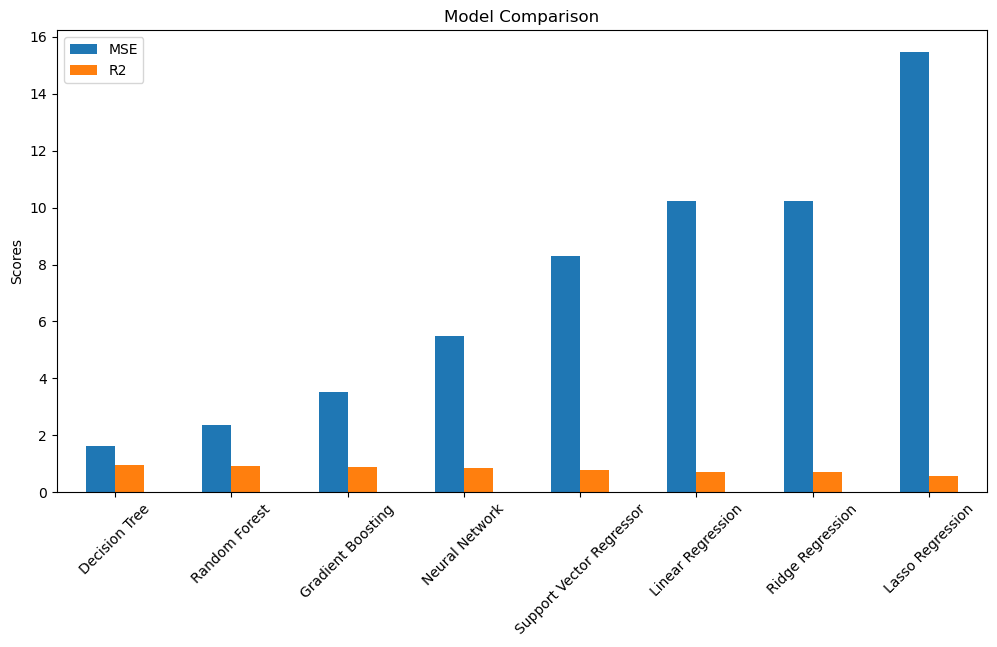

In [22]:
# Visualize model performance

results_c.sort_values(by='R2', ascending=False, inplace=True)
results_c.plot(kind='bar', figsize=(12, 6))
plt.title('Model Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()



## Hyperparameter Tuning

In [23]:
# Selecting the best model for hyperparameter tuning
best_model = DecisionTreeRegressor()  
best_model

DecisionTreeRegressor()

In [24]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['mse', 'friedman_mse', 'mae']
}

# Initialize the model
model = DecisionTreeRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2', verbose=2)

In [25]:
grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best R2 Score: 0.9187818562648099


In [26]:
# Final evaluation on the test set
final_model = grid_search.best_estimator_
y_final_pred = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_final_pred)
final_r2 = r2_score(y_test, y_final_pred)

print(f"Final Model MSE: {final_mse}")
print(f"Final Model R2: {final_r2}")

Final Model MSE: 2.1537017934196334
Final Model R2: 0.9401212731946974


#### Challenges Faced and Solutions

#### Data Preprocessing
- **Challenge**: The dataset had features with different scales, which could affect model performance.
- **Solution**: Used StandardScaler to normalize the data, ensuring all features contributed equally to the model.

#### Model Selection
- **Challenge**: Deciding the best model for predicting the concrete strength.
- **Solution**: Trained multiple models and compared them using R-squared and MSE. The best-performing model was selected for hyperparameter tuning.

#### Model Tuning
- **Challenge**: Finding the optimal hyperparameters for the chosen model.
- **Solution**: Used GridSearchCV to systematically search for the best combination of hyperparameters.
